<a href="https://colab.research.google.com/github/thefr33radical/hybrid_forecasting/blob/master/code/ARIMA_RNN_sunspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip uninstall pyramid
#!pip uninstall pyramid-arima
#!pip install pyramid-arima
#!pip install statsmodels
#!pip install pyramid-arima

Saving sunspot.csv to sunspot (4).csv
      value
time       
1700    5.0
1701   11.0
1702   16.0
1703   23.0
1704   36.0
1705   58.0
1706   29.0
1707   20.0
1708   10.0
1709    8.0
1710    3.0
1711    0.0
1712    0.0
1713    2.0
1714   11.0
1715   27.0
1716   47.0
1717   63.0
1718   60.0
1719   39.0
1720   28.0
1721   26.0
1722   22.0
1723   11.0
1724   21.0
1725   40.0
1726   78.0
1727  122.0
1728  103.0
1729   73.0
...     ...
1959  159.0
1960  112.3
1961   53.9
1962   37.5
1963   27.9
1964   10.2
1965   15.1
1966   47.0
1967   93.8
1968  105.9
1969  105.5
1970  104.5
1971   66.6
1972   68.9
1973   38.0
1974   34.5
1975   15.5
1976   12.6
1977   27.5
1978   92.5
1979  155.4
1980  154.7
1981  140.5
1982  115.9
1983   66.6
1984   45.9
1985   17.9
1986   13.4
1987   29.2
1988  100.2

[289 rows x 1 columns]


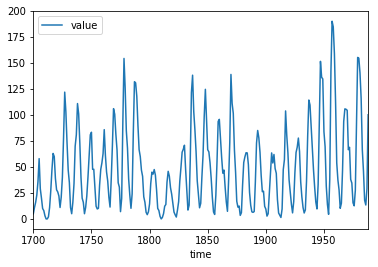

In [0]:
import pandas as pd 
import numpy as np
from google.colab import files
import io
from sklearn.metrics import r2_score,mean_squared_error as ms
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from pyramid.arima import auto_arima 

data = files.upload()
data = pd.read_csv(io.BytesIO(data["sunspot.csv"]))
data=data.set_index("time")


data.plot()
plt.show()

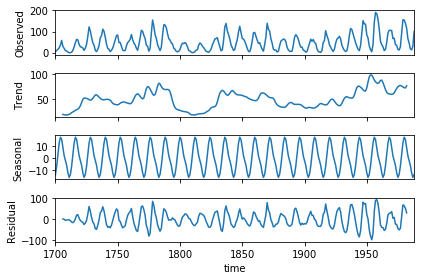

In [0]:
ndata= seasonal_decompose(data,model="additive",freq=12)
ndata.plot()
plt.show()

In [1]:
linear_data = ndata.trend+ ndata.seasonal 
linear_data.plot()
plt.show()

NameError: ignored

In [0]:
# Indvidual ARIMA

stepwise_model1 = auto_arima(data,start_P=1,max_p=9,trace=True, 
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model1.aic())

"""
# 67 period horizon
train = data.loc['1700-01-01':'1920-01-01']
test = data.loc['1920-01-01':'1987-01-01']

# 35 period horizon
train = data.loc['1700-01-01':'1952-01-01']
test = data.loc['1952-01-01':'1987-01-01']
"""

# 35 period horizon
train = data.loc['1700-01-01':'1952-01-01']
test = data.loc['1952-01-01':'1987-01-01']
stepwise_model1.fit(train)

future_forecast1 = stepwise_model1.predict(n_periods=35)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=2645.435, BIC=2652.761, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=2550.946, BIC=2561.935, Fit time=0.071 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=2561.691, BIC=2572.680, Fit time=0.215 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=2534.879, BIC=2549.531, Fit time=0.167 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=2427.188, BIC=2449.165, Fit time=0.409 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=2426.226, BIC=2451.866, Fit time=0.702 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=2495.424, BIC=2517.402, Fit time=0.332 seconds
Fit ARIMA: order=(4, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=n

In [0]:
# Individual ARIMA Score
print(ms(test,future_forecast1))


942.0115584244164


In [0]:
# Hybrid ARIMA

stepwise_model2 = auto_arima(linear_data[6:-6],start_P=1,max_p=9,trace=True, 
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model2.aic())

"""
# 67 period horizon
train = data.loc['1700-01-01':'1920-01-01']
test = data.loc['1920-01-01':'1987-01-01']

# 35 period horizon
train = data.loc['1700-01-01':'1952-01-01']
test = data.loc['1952-01-01':'1987-01-01']
"""

# 35 period horizon
train = linear_data.loc['1706-01-01':'1947-01-01']
test = linear_data.loc['1947-01-01':'1982-01-01']
stepwise_model2.fit(train)

future_forecast2 = stepwise_model2.predict(n_periods=35)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1169.247, BIC=1190.970, Fit time=0.330 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1844.703, BIC=1851.944, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1561.785, BIC=1572.646, Fit time=0.055 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1168.500, BIC=1186.602, Fit time=0.188 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1170.266, BIC=1191.988, Fit time=0.213 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1257.144, BIC=1271.626, F

In [0]:
# Hybrid ARIMA Score
print(ms(test,future_forecast2))

209.36480268055587


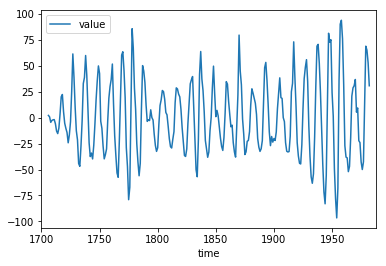

In [0]:
# Use non lnear data for ANN
non_linear_data = ndata.resid
non_linear_data.plot()
plt.show()

* https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
* https://anomaly.io/seasonal-trend-decomposition-in-r/
* Text Books - Forecasting: Principles and Practice https://otexts.com/fpp2/

In [0]:
# Individual ANN
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score,mean_squared_error as ms
from sklearn.preprocessing import MinMaxScaler

"""
train_data =  non_linear_data.iloc[2:221,:]
test_data =  non_linear_data.iloc[222:-2,:]
"""

train_data =  data.iloc[:252,:]
test_data =  data.iloc[253:,:]

x_train = train_data[:-1]
y_train = train_data[1:]

x_test = test_data[:-1]
y_test = test_data[1:]

model = Sequential()
model.add(Dense(4,input_dim=1,activation="sigmoid"))
model.add(Dense(4))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")
early_stop = EarlyStopping(monitor ="loss",patience =20, verbose =1)
model.fit(x_train,y_train, epochs =100, callbacks=[early_stop],batch_size=10,verbose=1,shuffle= False)
y_test_pred = model.predict(x_test)

y_train_pred = model.predict(x_train)


Epoch 1/100
251/251 [==============================] - 0s 2ms/step - loss: 3335.9910
Epoch 2/100
251/251 [==============================] - 0s 142us/step - loss: 3323.4071
Epoch 3/100
251/251 [==============================] - 0s 126us/step - loss: 3311.4589
Epoch 4/100
251/251 [==============================] - 0s 135us/step - loss: 3299.7161
Epoch 5/100
251/251 [==============================] - 0s 125us/step - loss: 3287.6241
Epoch 6/100
251/251 [==============================] - 0s 129us/step - loss: 3274.4171
Epoch 7/100
251/251 [==============================] - 0s 132us/step - loss: 3259.1502
Epoch 8/100
251/251 [==============================] - 0s 132us/step - loss: 3240.8448
Epoch 9/100
251/251 [==============================] - 0s 140us/step - loss: 3215.1366
Epoch 10/100
251/251 [==============================] - 0s 137us/step - loss: 3138.1402
Epoch 11/100
251/251 [==============================] - 0s 132us/step - loss: 3070.7649
Epoch 12/100
251/251 [=====================

In [0]:
# Individual ANN Score

print("The MSE score on the Train set is:\t{:0.3f}".format(ms(y_train, y_train_pred)))
print("The MSE score on the Test set is:\t{:0.3f}".format(ms(y_test, y_test_pred)))

The MSE score on the Train set is:	555.339
The MSE score on the Test set is:	2406.460


In [0]:
# Hybrid ANN
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score,mean_squared_error as ms
from sklearn.preprocessing import MinMaxScaler

train_data2 =  non_linear_data.iloc[6:247,:]
test_data2 =  non_linear_data.iloc[247:282,:]

x_train2 = train_data2[:-1]
y_train2 = train_data2[1:]

x_test2 = test_data2[:-1]
y_test2 = test_data2[1:]

model2 = Sequential()
model2.add(Dense(4,input_dim=1,activation="sigmoid"))
model2.add(Dense(4))
model2.add(Dense(1))

model2.compile(loss="mean_squared_error",optimizer="adam")
early_stop = EarlyStopping(monitor ="loss",patience =20, verbose =1)
model2.fit(x_train2,y_train2, epochs =100, batch_size=10,verbose=1,shuffle= False)

y_test_pred2 = model2.predict(x_test2)
y_train_pred2 = model2.predict(x_train2)


Epoch 1/100
240/240 [==============================] - 0s 2ms/step - loss: 1046.1133
Epoch 2/100
240/240 [==============================] - 0s 123us/step - loss: 1039.6881
Epoch 3/100
240/240 [==============================] - 0s 132us/step - loss: 1033.3232
Epoch 4/100
240/240 [==============================] - 0s 130us/step - loss: 1026.9991
Epoch 5/100
240/240 [==============================] - 0s 127us/step - loss: 1020.6677
Epoch 6/100
240/240 [==============================] - 0s 134us/step - loss: 1014.2941
Epoch 7/100
240/240 [==============================] - 0s 131us/step - loss: 1007.8534
Epoch 8/100
240/240 [==============================] - 0s 137us/step - loss: 1001.3241
Epoch 9/100
240/240 [==============================] - 0s 136us/step - loss: 994.6862
Epoch 10/100
240/240 [==============================] - 0s 125us/step - loss: 987.9237
Epoch 11/100
240/240 [==============================] - 0s 134us/step - loss: 981.0217
Epoch 12/100
240/240 [========================

In [0]:
# Hybrid ANN Score

print("The R2 score on the Train set is:\t{:0.3f}".format(ms(y_train2, y_train_pred2)))
print("The R2 score on the Test set is:\t{:0.3f}".format(ms(y_test2, y_test_pred2)))

The R2 score on the Train set is:	454.509
The R2 score on the Test set is:	1280.965
